<h1 style="text-align: center"> Assignment 2 Part B: Analysis of top features used to predict the likelihood of an existing customer buying a new car </h1>

### Savinay Singh 
### Student ID: <b><u>24591935</u></b>
### 27 April 2023


<p style="font-size:18px;">Table of Content
<ol>
    <li>Importing the libraries</li>
    <li>Importing the dataset</li>
    <ul>
        <li>About the dataset</li>
    </ul>
     <li>Data Preprocessing</li>
    <ul>
        <li>Handling the missing data</li>
        <li>Label Encoding</li>
    </ul>
    <li>Feature Selection</li>
    <li>Intitial Data Visualisation</li>
    <li>Train Test Split</li>
    <li>Handling Class Imbalance</li>
    <li>Final Data Visualisation</li>
    <li>Feature Scaling</li>
    <li>Modelling and Evaluation</li>
  
   
</ol>
</p>

# 1. Importing the libraries

<p style="font-size:18px;">
    To utilise the pre-written code and functionality the libraries given below are imported. 
</p>

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from imblearn.over_sampling import SMOTE 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.metrics import classification_report
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from scipy.stats import chi2_contingency
import statsmodels.api as sms

# 2. Importing the dataset

In [4]:
df=pd.read_csv('./repurchase_training.csv')

## 2.1. About the dataset

In [5]:
str_about_data='''ID: Unique ID of the customer

target: Model target. 1 if the customer has purchased more than 1 vehicle, 0 if they have only purchased 1.

age_band: Age banded into categories

gender: Male, Female or Missing

car_model: The model of vehicle, 18 models in total

car_segment: The type of vehicle

age_of_vehicle_years: Age of their last vehicle, in deciles

sched_serv_warr: Number of scheduled services (e.g. regular check-ups) used under warranty, in deciles

non_sched_serv_warr: Number of non-scheduled services (e.g. something broke out of the service cycle) used under warranty, in deciles

sched_serv_paid: Amount paid for scheduled services, in deciles

non_sched_serv_paid: Amount paid for non scheduled services, in deciles

total_paid_services: Amount paid in total for services, in deciles

total_services: Total number of services, in deciles

mth_since_last_serv: The number of months since the last service, in deciles

annualised_mileage: Annualised vehicle mileage, in deciles

num_dealers_visited: Number of different dealers visited for servicing, in deciles

num_serv_dealer_purchased: Number of services had at the same dealer where the vehicle was purchased, in deciles'''

In [6]:
dict_about_data=dict(zip([x.split(':')[0] for x in str_about_data.split('\n\n')],[x.split(':')[1] for x in str_about_data.split('\n\n')]))

In [7]:
dict_about_data

{'ID': ' Unique ID of the customer',
 'target': ' Model target. 1 if the customer has purchased more than 1 vehicle, 0 if they have only purchased 1.',
 'age_band': ' Age banded into categories',
 'gender': ' Male, Female or Missing',
 'car_model': ' The model of vehicle, 18 models in total',
 'car_segment': ' The type of vehicle',
 'age_of_vehicle_years': ' Age of their last vehicle, in deciles',
 'sched_serv_warr': ' Number of scheduled services (e.g. regular check-ups) used under warranty, in deciles',
 'non_sched_serv_warr': ' Number of non-scheduled services (e.g. something broke out of the service cycle) used under warranty, in deciles',
 'sched_serv_paid': ' Amount paid for scheduled services, in deciles',
 'non_sched_serv_paid': ' Amount paid for non scheduled services, in deciles',
 'total_paid_services': ' Amount paid in total for services, in deciles',
 'total_services': ' Total number of services, in deciles',
 'mth_since_last_serv': ' The number of months since the last se

In [8]:
pd.DataFrame.from_dict(dict_about_data,orient='index')

,0
ID,Unique ID of the customer
target,Model target. 1 if the customer has purchased...
age_band,Age banded into categories
gender,"Male, Female or Missing"
car_model,"The model of vehicle, 18 models in total"
car_segment,The type of vehicle
age_of_vehicle_years,"Age of their last vehicle, in deciles"
sched_serv_warr,Number of scheduled services (e.g. regular ch...
non_sched_serv_warr,Number of non-scheduled services (e.g. someth...
sched_serv_paid,"Amount paid for scheduled services, in deciles"


<pre style="font-size:18px;">
    <h2>Data Privacy Risks</h2>
    Repurchase data can be utilised for targeted marketing initiatives, which some customers may find intrusive or unwanted. Customers' privacy may have been violated if their information was utilised for marketing without their explicit permission.
    
    Thre is no mention of any sensitive information such as vehicle identification number (VIN) or Personal Identifiable Information (PII) in the dataset
</pre>

# 3. Data-Preprocessing

## 3.1. Handling the missing data

In [9]:
df.isna().sum()

ID                                0
Target                            0
age_band                     112375
gender                        69308
car_model                         0
car_segment                       0
age_of_vehicle_years              0
sched_serv_warr                   0
non_sched_serv_warr               0
sched_serv_paid                   0
non_sched_serv_paid               0
total_paid_services               0
total_services                    0
mth_since_last_serv               0
annualised_mileage                0
num_dealers_visited               0
num_serv_dealer_purchased         0
dtype: int64

<p style="font-size:18px;">
    The bar chart below shows the missig values for age band and gender
</p>

<BarContainer object of 17 artists>

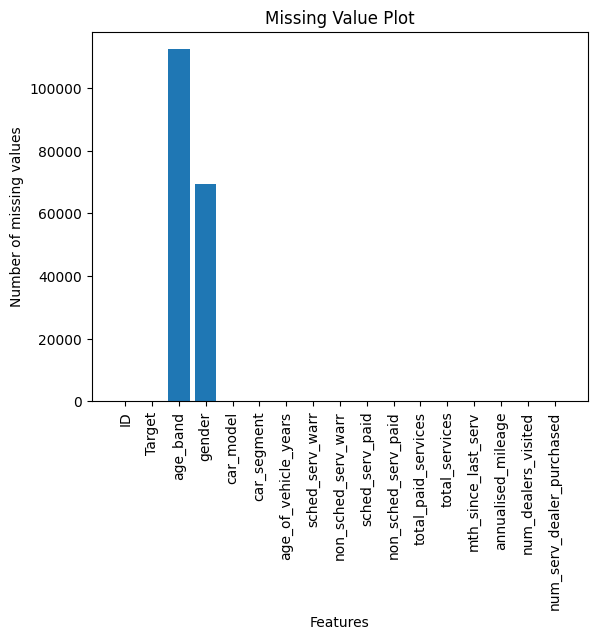

In [10]:
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Number of missing values')
plt.title('Missing Value Plot')
plt.bar(df.isna().sum().index,df.isna().sum().values)

<p style="font-size:18px;">
    Removal of ID because it is a redundant feature
</p>

In [11]:
# Removal of ID because it is a redundant feature
df=df.drop('ID',axis=1)

<p style="font-size:18px;">
    Checking the distribution of gender to search for a pattern
</p>

In [12]:
df.gender.value_counts()

Male      36072
Female    25957
Name: gender, dtype: int64

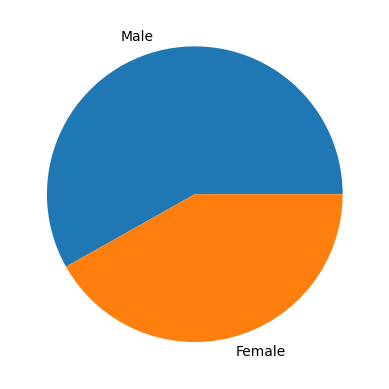

In [15]:
plt.pie(df.gender.value_counts(),labels=['Male','Female'])
plt.show()

In [13]:
df[df.Target==0].gender.value_counts()

Male      35115
Female    25570
Name: gender, dtype: int64

In [14]:
df[df.Target==1].gender.value_counts()

Male      957
Female    387
Name: gender, dtype: int64

<p style="font-size:18px;">
    Gender needs to be handled as not stated
</p>

In [17]:
df.loc[df.gender.isna(),'gender']='Not Stated'

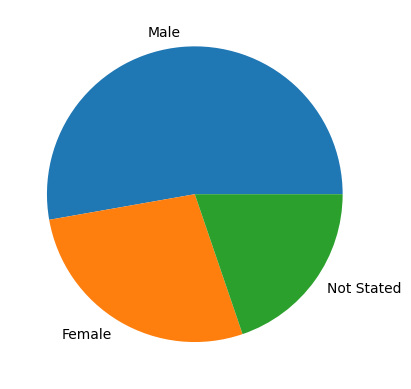

In [18]:
plt.pie(df.gender.value_counts(),labels=['Male','Female','Not Stated'])
plt.show()

<p style="font-size:18px;">
    Checking the distribution of age band to search for a pattern
</p>

In [19]:
df.age_band.value_counts(1)

4. 45 to 54    0.214007
3. 35 to 44    0.202141
2. 25 to 34    0.187111
5. 55 to 64    0.179148
6. 65 to 74    0.112857
7. 75+         0.053739
1. <25         0.050997
Name: age_band, dtype: float64

In [20]:
df[df.Target==0].age_band.value_counts(1)

4. 45 to 54    0.213580
3. 35 to 44    0.202157
2. 25 to 34    0.187637
5. 55 to 64    0.178348
6. 65 to 74    0.113116
7. 75+         0.053755
1. <25         0.051407
Name: age_band, dtype: float64

In [21]:
df[df.Target==1].age_band.value_counts(1)

4. 45 to 54    0.248908
5. 55 to 64    0.244541
3. 35 to 44    0.200873
2. 25 to 34    0.144105
6. 65 to 74    0.091703
7. 75+         0.052402
1. <25         0.017467
Name: age_band, dtype: float64

In [22]:
len(df[df.age_band.isna()])/len(df)

0.8556233201611122

<p style="font-size:18px;">
    Removing age band because it has more than 85% of the missing values
</p>

In [23]:
df=df.drop('age_band',axis=1)

## 3.2. Label Encoding

In [24]:
labelencoder = LabelEncoder()
df['gender']=labelencoder.fit_transform(df['gender'])
df['car_model']=labelencoder.fit_transform(df['car_model'])
df['car_segment']=labelencoder.fit_transform(df['car_segment'])

In [25]:
df

,Target,gender,car_model,car_segment,age_of_vehicle_years,sched_serv_warr,non_sched_serv_warr,sched_serv_paid,non_sched_serv_paid,total_paid_services,total_services,mth_since_last_serv,annualised_mileage,num_dealers_visited,num_serv_dealer_purchased
0,0,1,0,0,9,2,10,3,7,5,6,9,8,10,4
1,0,2,11,3,6,10,3,10,4,9,10,6,10,7,10
2,0,1,12,1,9,10,9,10,9,10,10,7,10,6,10
3,0,2,12,1,5,8,5,8,4,5,6,4,10,9,7
4,0,0,11,3,8,9,4,10,7,9,8,5,4,4,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131332,1,2,12,1,7,10,10,9,10,10,10,3,6,10,10
131333,1,2,12,1,4,10,10,10,10,10,10,2,3,10,10
131334,1,2,14,1,4,4,9,5,4,3,8,4,7,10,10
131335,1,2,14,1,2,1,10,1,10,9,8,3,6,7,10


# 4. Feature Selection

<p style="font-size:18px;">
    Selecting top features using chi-square
</p>

In [32]:
selector = SelectKBest(chi2, k=5)
X_new = selector.fit_transform(df.drop('Target',axis=1), df['Target'])

In [33]:
selected_features = selector.get_support(indices=True)

In [35]:
selected_feature_names = df.drop('Target',axis=1).columns[selected_features]


In [36]:
selected_feature_names

Index(['age_of_vehicle_years', 'sched_serv_warr', 'sched_serv_paid',
       'total_services', 'mth_since_last_serv'],
      dtype='object')

In [37]:
df=df[['Target','age_of_vehicle_years','sched_serv_warr','sched_serv_paid','total_services','mth_since_last_serv']]

In [38]:
df

,Target,age_of_vehicle_years,sched_serv_warr,sched_serv_paid,total_services,mth_since_last_serv
0,0,9,2,3,6,9
1,0,6,10,10,10,6
2,0,9,10,10,10,7
3,0,5,8,8,6,4
4,0,8,9,10,8,5
...,...,...,...,...,...,...
131332,1,7,10,9,10,3
131333,1,4,10,10,10,2
131334,1,4,4,5,8,4
131335,1,2,1,1,8,3


## Checking feature's association with the Target variable using Cramer's V

<p style="font-size:18px;">
    None of the features above show a high association with the target variable as the Cramer's V is less than 0.5 for all
</p>

In [44]:
for x in ['age_of_vehicle_years','sched_serv_warr','sched_serv_paid','total_services','mth_since_last_serv']: 
    # create a contingency table of the two variables
    cont_table = pd.crosstab(df['Target'], df[x])

    # compute the chi-squared test statistic and p-value
    chi2_stat, p_val, dof, exp_freq = chi2_contingency(cont_table)

    # compute the Cramer's V measure from the chi-squared test statistic
    n_obs = df.shape[0]
    n_cells = cont_table.size
    v_cramer = np.sqrt(chi2_stat / (n_obs * (min(n_cells, 2) - 1)))

    print('Cramer\'s V for {}:'.format(x), v_cramer)

Cramer's V for age_of_vehicle_years: 0.14127066010635264
Cramer's V for sched_serv_warr: 0.20831948084928478
Cramer's V for sched_serv_paid: 0.19780823766602512
Cramer's V for total_services: 0.205533865172324
Cramer's V for mth_since_last_serv: 0.1618611072485944


# 5. Initial Data Visualisation 

<p style="font-size:18px;">
    The grouped bar chart below displays different categories of a feature with each set of bars representing a specific category, and each bar within the set indicating the target value associated to that category.
</p>

In [45]:
X=df.drop('Target',axis=1)

In [46]:
assert X.shape==(131337, 5)

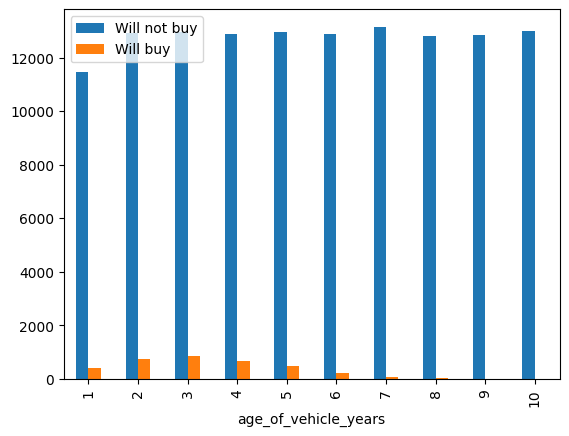

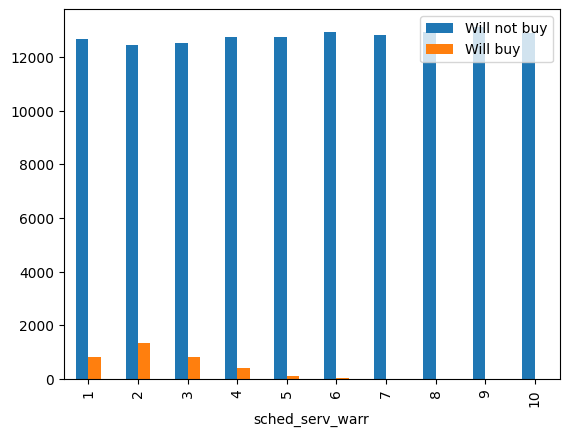

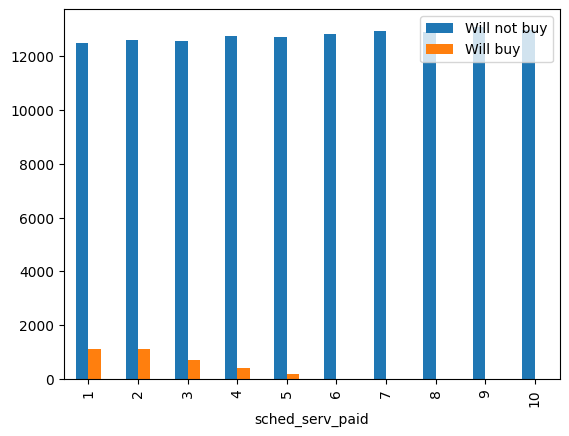

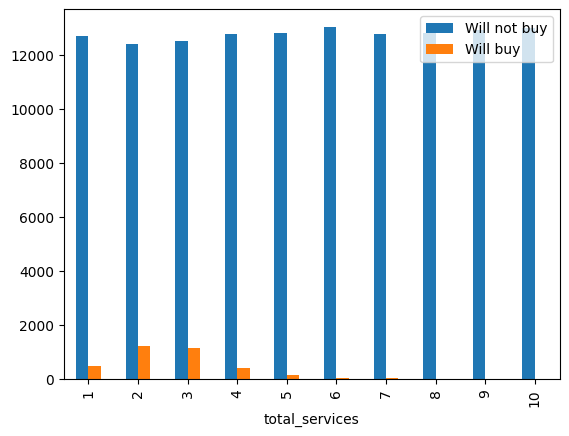

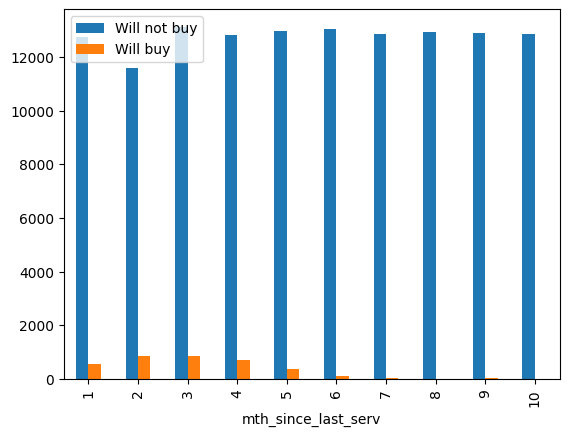

In [47]:
for col in X:
    df_serv=pd.DataFrame(df[df.Target==0].groupby(by=col).count().Target)
    df_serv.columns=[ 'Will not buy']
    df_serv['Will buy']=df[df.Target==1].groupby(by=col).count().Target
    df_serv.plot(kind='bar')

# 6. Train Test Split

In [48]:
X=df.drop('Target',axis=1)
y=df.Target

In [49]:
assert X.shape==(131337, 5)
assert y.shape==(131337, )

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [51]:
assert X_train.shape==(87995, 5)
assert y_train.shape==(87995,)
assert X_test.shape==(43342, 5)
assert y_test.shape==(43342,)

# 7. Handling the class imbalance

<p style="font-size:18px;">
    SMOTE is a technique used here to generate synthetic samples for the minority class by interpolating between neighboring examples. This helps to balance the distribution of classes and improve the performance of the model.
</p>

In [52]:
y_train.value_counts()

0    85622
1     2373
Name: Target, dtype: int64

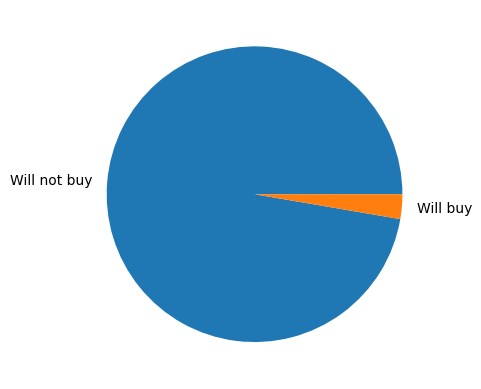

In [53]:
plt.pie(y_train.value_counts(),labels=['Will not buy','Will buy'])
plt.show()

In [54]:
sm = SMOTE(random_state=42)

In [55]:
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

In [56]:
y_train_sm.value_counts()

0    85622
1    85622
Name: Target, dtype: int64

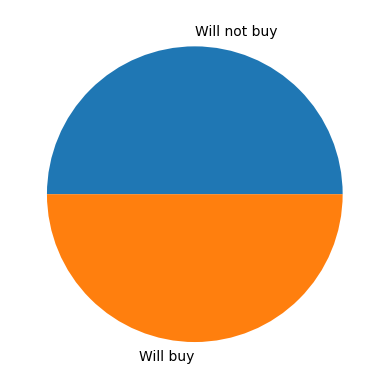

In [57]:
plt.pie(y_train_sm.value_counts(),labels=['Will not buy','Will buy'])
plt.show()

# 8. Final Data Visualisation

<p style="font-size:18px;">
    The grouped bar chart below displays different categories of a feature with each set of bars representing a specific category, and each bar within the set indicating the target value associated to that category.
</p>

In [58]:
df2_train=X_train_sm.copy()
df2_train['Target']=y_train_sm

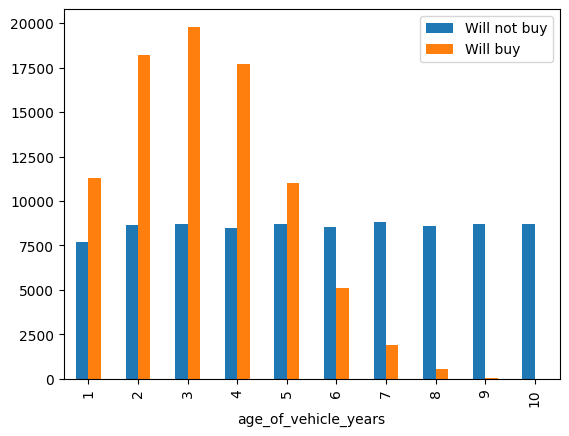

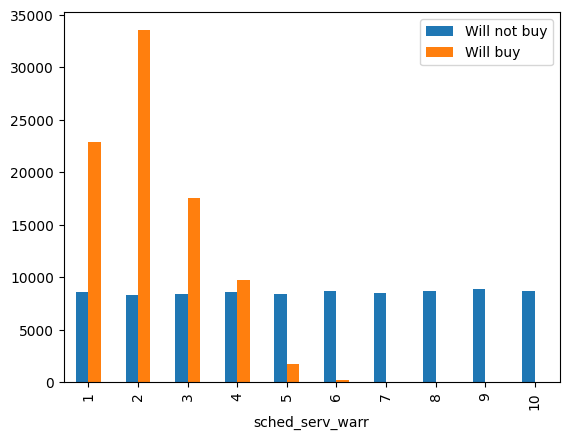

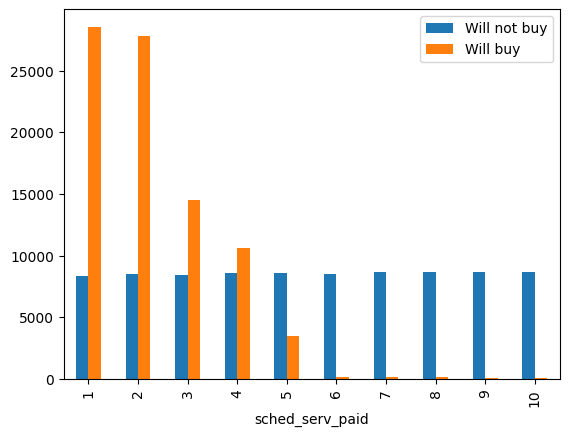

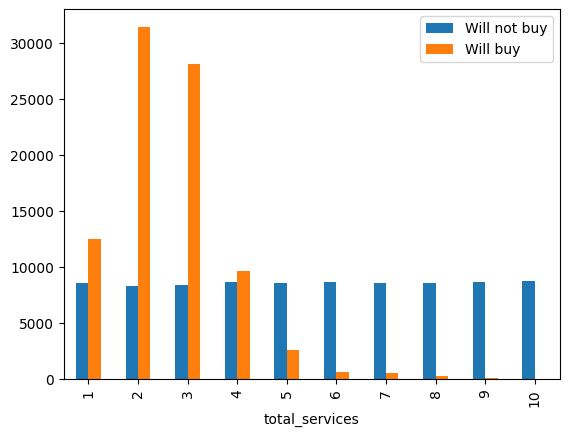

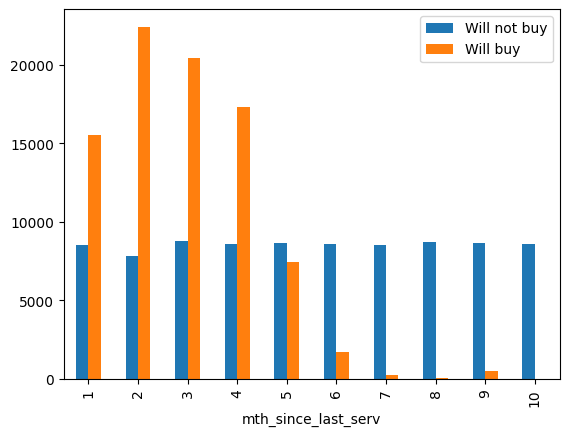

In [59]:
for col in X:
    df_serv=pd.DataFrame(df2_train[df2_train.Target==0].groupby(by=col).count().Target)
    df_serv.columns=[ 'Will not buy']
    df_serv['Will buy']=df2_train[df2_train.Target==1].groupby(by=col).count().Target
    df_serv.plot(kind='bar')


# 9. Feature Scaling

<p style="font-size:18px;">
   Feature scaling to bring all the features of the dataset to a similar scale or range of values.
</p>

In [60]:
# Feature Scaling using Standardization: range [0,1]
scaler = preprocessing.StandardScaler().fit(X_train_sm.append(X_test))
X_train_sm = scaler.transform(X_train_sm)
X_test = scaler.transform(X_test)

/var/folders/0h/j84rsdwd49jbw1_d04_c5b3r0000gn/T/ipykernel_76685/2812475265.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scaler = preprocessing.StandardScaler().fit(X_train_sm.append(X_test))


In [61]:
assert isinstance(X_train_sm, np.ndarray)
assert isinstance(X_test, np.ndarray)

# 10. Modelling and Evaluation

In [62]:
lr_model = LogisticRegression(random_state=0).fit(X_train_sm, y_train_sm)

In [63]:
y_pred=lr_model.predict(X_train_sm)

In [64]:
accuracy_score(y_train_sm, y_pred)

0.850943682698372

In [65]:
score={}
score['Training']=accuracy_score(y_train_sm, y_pred)

In [66]:
y_pred=lr_model.predict(X_test)

In [67]:
accuracy_score(y_test, y_pred)

0.7795440911817636

In [68]:
score['Testing']=accuracy_score(y_test, y_pred)

<p style="font-size:18px;">
    The bar graph below demonstrates that training and testing accuracy for logistic regression classification
</p>

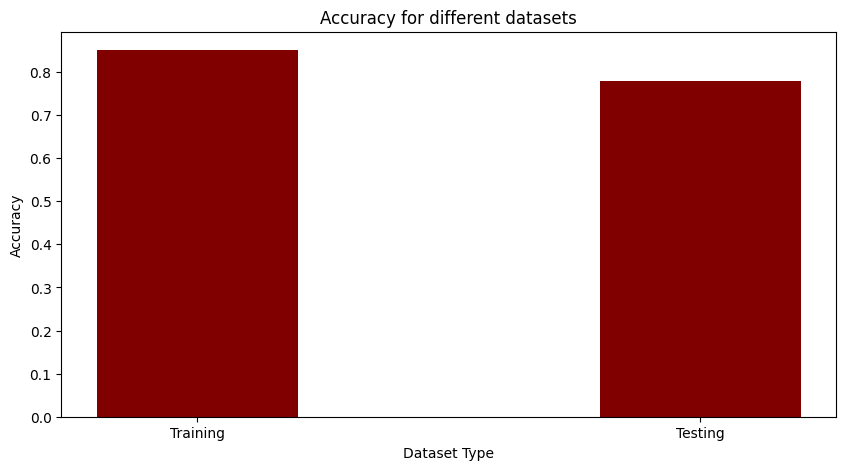

In [69]:
fig = plt.figure(figsize = (10, 5))
# creating the bar plot
plt.bar(score.keys(), score.values(), color ='maroon',
        width = 0.4)
plt.xlabel("Dataset Type")
plt.ylabel("Accuracy")
plt.title('Accuracy for different datasets')
plt.show()

<p style="font-size:18px;">
    According to the classification report f-1 Score for positive class is insignificant
</p>

<p style="font-size:18px;">
    The precision value is less for the positive class and it suggests that a significant number of instances predicted to be positive for this class are actually false positives.
</p>

In [70]:
print(classification_report(y_test, y_pred, target_names=['Will not rebuy','Will rebuy']))

                precision    recall  f1-score   support

Will not rebuy       1.00      0.78      0.87     42194
    Will rebuy       0.10      0.88      0.17      1148

      accuracy                           0.78     43342
     macro avg       0.55      0.83      0.52     43342
  weighted avg       0.97      0.78      0.85     43342



## Checking feature importance for logistic regression

<p style="font-size:18px;">
    sched_serv_warr has the highest magnitude coef value and 0 p-value so it is the most important feature for prediction
</p>

In [74]:
X_obs = sms.add_constant(pd.DataFrame(X_train_sm,columns=X.columns)) # add a constant intercept term
model = sms.Logit(y_train_sm, X_obs)
result = model.fit()

# print the summary table with coefficient and p-value information
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.417723
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 Target   No. Observations:               171244
Model:                          Logit   Df Residuals:                   171238
Method:                           MLE   Df Model:                            5
Date:                Wed, 26 Apr 2023   Pseudo R-squ.:                  0.3974
Time:                        22:51:31   Log-Likelihood:                -71533.
converged:                       True   LL-Null:                   -1.1870e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.6317      0.008    -74.604      0.000      -0.648      -0.615

<p style="font-size:18px;">
    List of hyperparameters of the logistic regression model
</p>

In [75]:
lr_model.get_params()


{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 0,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}